Dimensiones del dataset: (15000, 19)

Primeras filas:
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea            

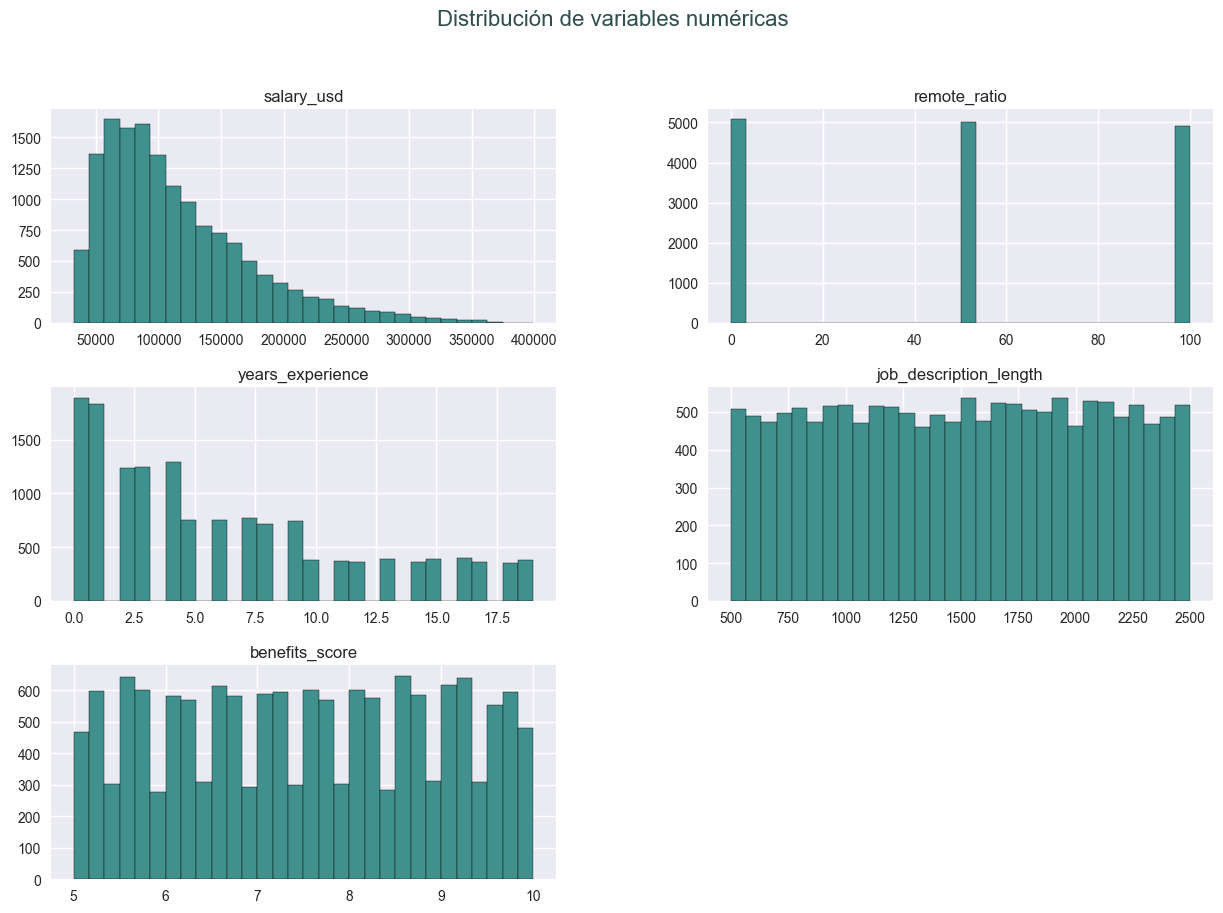

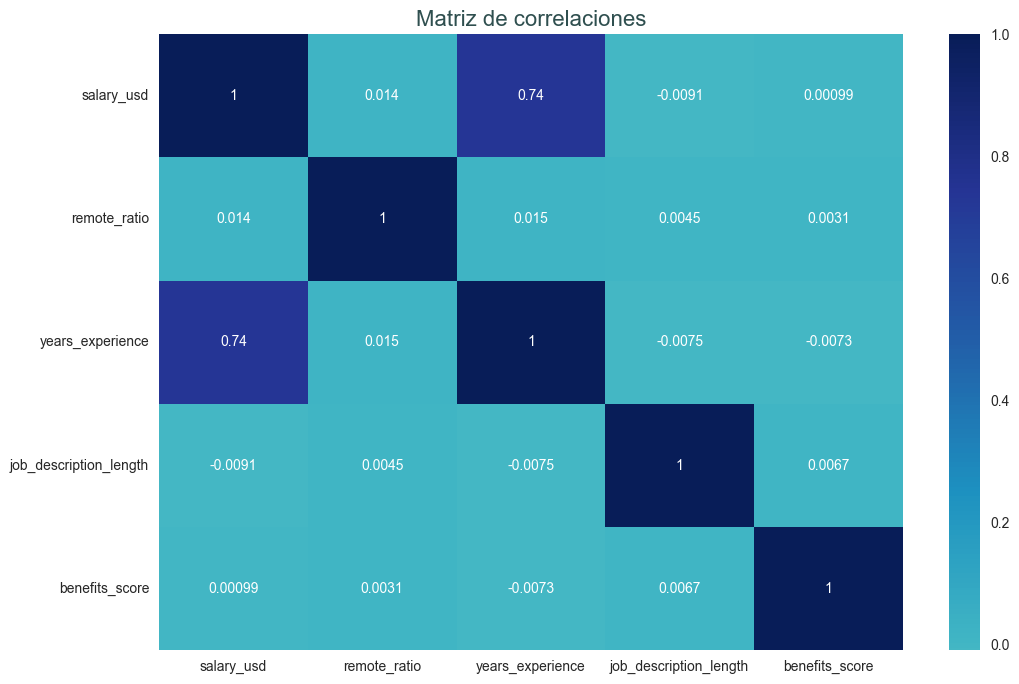

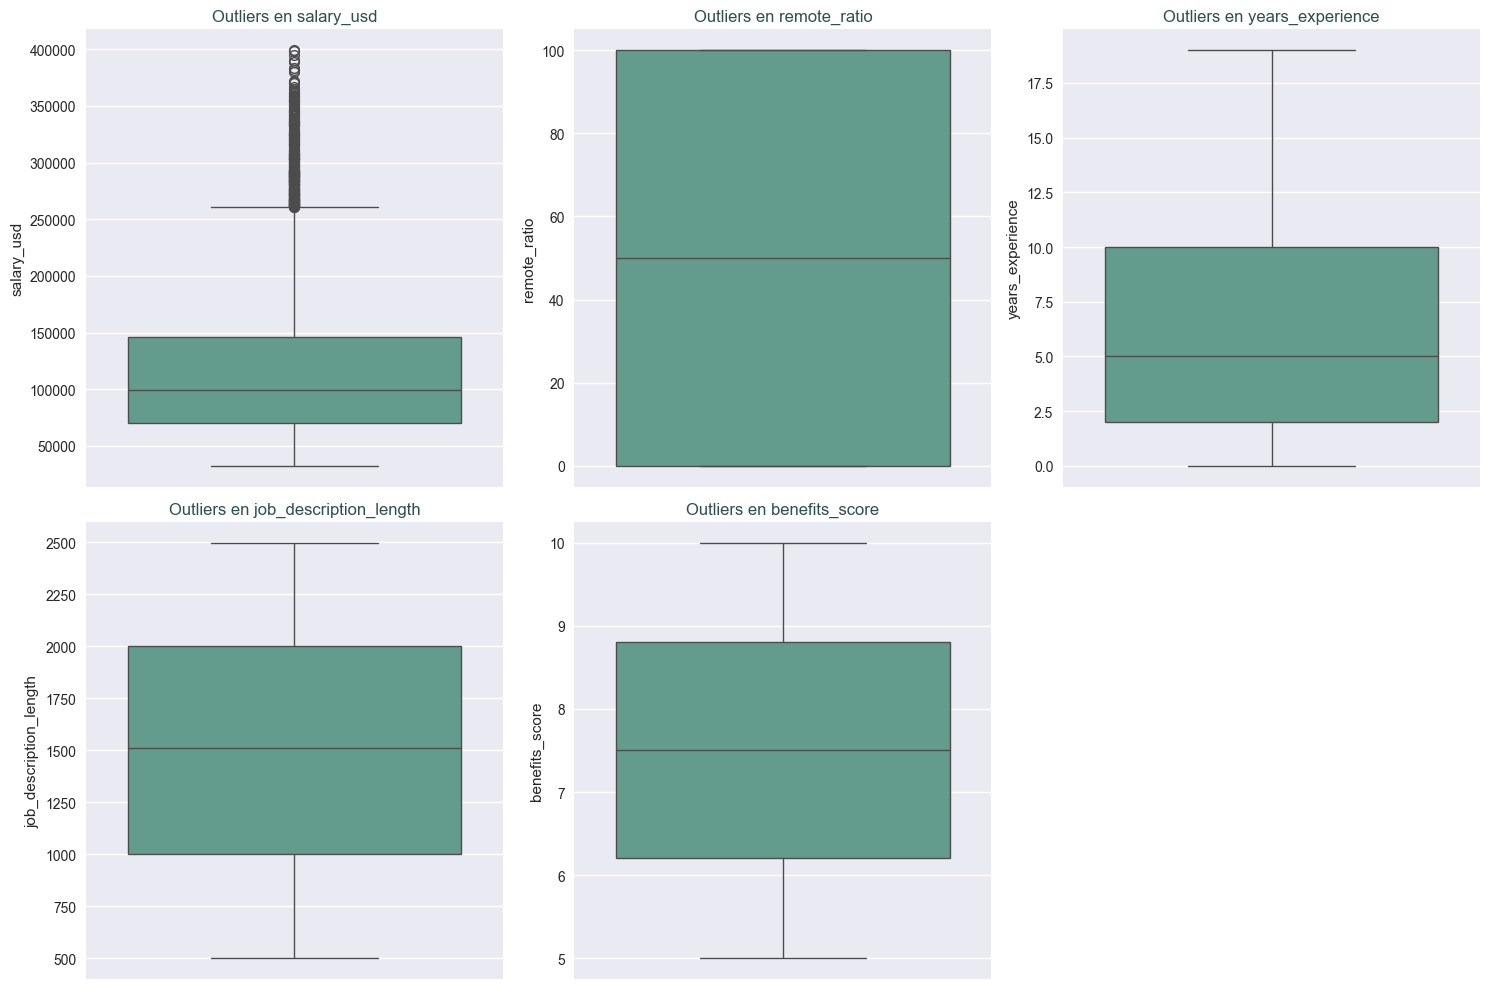

In [6]:
# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n est√©tica: tonos verde-azulados
custom_palette = sns.color_palette("crest")  # paleta azul-verde
sns.set_palette(custom_palette)


# 1. Cargar dataset
df = pd.read_csv("data/ai_job_dataset.csv")

# 2. Exploraci√≥n inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

print("\nTipos de datos:")
print(df.dtypes)

# 3. Valores faltantes y duplicados
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nN√∫mero de duplicados:", df.duplicated().sum())

# 4. Estad√≠sticas descriptivas
print("\nEstad√≠sticas descriptivas:")
print(df.describe(include="all"))

# 5. Distribuci√≥n de variables num√©ricas (histogramas)
df.hist(bins=30, figsize=(15, 10), edgecolor='black', color=custom_palette[2])
plt.suptitle("Distribuci√≥n de variables num√©ricas", fontsize=16, color="darkslategray")
plt.show()

# 6. Matriz de correlaci√≥n
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", center=0)  # azul-verde
plt.title("Matriz de correlaciones", fontsize=16, color="darkslategray")
plt.show()

# 7. Boxplots para detectar outliers
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, y=col, color=custom_palette[1])  # azul verdoso
    plt.title(f"Outliers en {col}", color="darkslategray")
plt.tight_layout()
plt.show()


1. Exploratory Data Analysis (EDA)

El EDA inicial tuvo como objetivo comprender la estructura y calidad de los datos antes de aplicar modelos o an√°lisis avanzados. Para ello, se llevaron a cabo las siguientes tareas:

Revisi√≥n de dimensiones del dataset y sus columnas.

Identificaci√≥n de tipos de datos (num√©ricos, categ√≥ricos, fechas).

Detecci√≥n de valores nulos y registros duplicados.

Obtenci√≥n de estad√≠sticas descriptivas de las variables.

Visualizaci√≥n de distribuciones de las variables num√©ricas mediante histogramas.

An√°lisis de correlaciones entre variables num√©ricas con un mapa de calor.

Detecci√≥n de valores at√≠picos (outliers) mediante boxplots.

Resultado: Se obtuvo una visi√≥n general del dataset, identificando la calidad de los datos, posibles inconsistencias y patrones iniciales que guiar√°n las siguientes fases de an√°lisis.

In [8]:
import pandas as pd

# ========================
# 1. EXTRACT
# ========================
# Intentar distintos delimitadores
for sep in [",", ";", "\t", "|"]:
    try:
        df = pd.read_csv("data/ai_job_dataset.csv", sep=sep)
        print(f"‚úî Archivo le√≠do correctamente con delimitador '{sep}'")
        print(df.head(5))
        break
    except Exception as e:
        continue

# ========================
# 2. TRANSFORM
# ========================

# Renombrar columnas (sin espacios, min√∫sculas, _ en vez de espacios)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

# Eliminar duplicados
df = df.drop_duplicates()

# Manejar valores nulos (ejemplo: rellenar con mediana en num√©ricas, "Desconocido" en categ√≥ricas)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Desconocido")
    else:
        df[col] = df[col].fillna(df[col].median())

# Convertir columnas de fechas (si existen)
date_cols = [col for col in df.columns if "date" in col or "fecha" in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Normalizar texto en columnas categ√≥ricas
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# ========================
# 3. LOAD
# ========================
output_path = "data/ai_job_dataset_clean.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n‚úÖ ETL completado. Dataset limpio guardado en: {output_path}")
print("Dimensiones finales:", df.shape)
print("Columnas:", df.columns.tolist())


‚úî Archivo le√≠do correctamente con delimitador ','
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             

2. ETL (Extract ‚Äì Transform ‚Äì Load)

El proceso ETL tuvo como objetivo limpiar y preparar el dataset para que pueda ser utilizado en an√°lisis avanzados. Se siguieron los siguientes pasos:

üîπ Extract

Lectura del archivo ai_job_dataset.csv, verificando delimitadores y estructura de columnas.

üîπ Transform

Normalizaci√≥n de nombres de columnas (formato snake_case).

Eliminaci√≥n de registros duplicados.

Tratamiento de valores nulos: imputaci√≥n en variables num√©ricas y categ√≥ricas.

Conversi√≥n de columnas de fecha a formato datetime.

Homogeneizaci√≥n de variables categ√≥ricas (min√∫sculas y sin espacios extra).

üîπ Load

Exportaci√≥n del dataset procesado a un nuevo archivo: ai_job_dataset_clean.csv.

Resultado: Se obtuvo un dataset limpio, estandarizado y libre de duplicados, listo para an√°lisis estad√≠stico, modelado y visualizaci√≥n avanzada.

‚úî Archivo cargado correctamente
Dimensiones iniciales: (15000, 19)


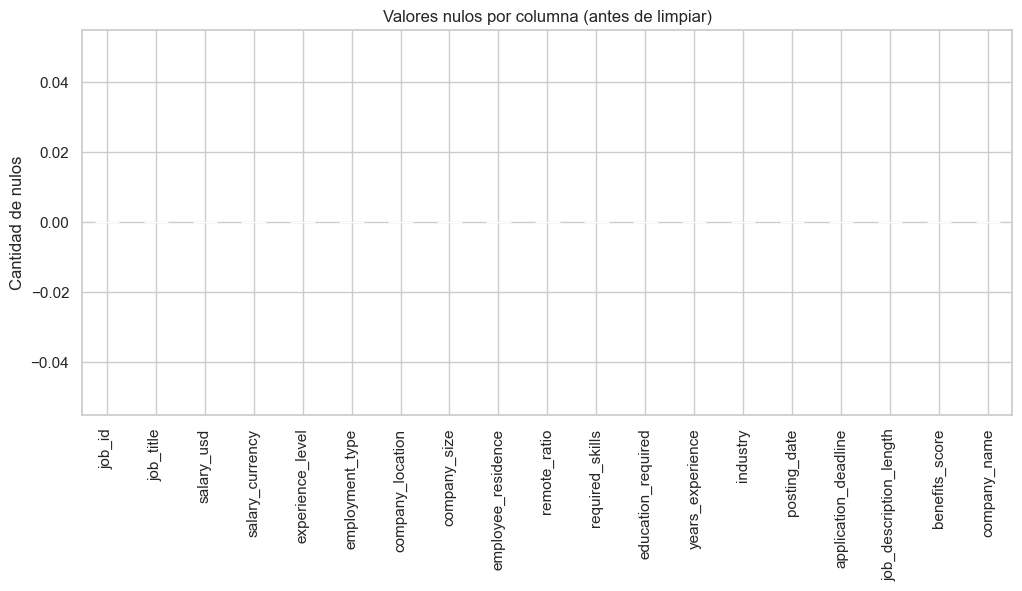

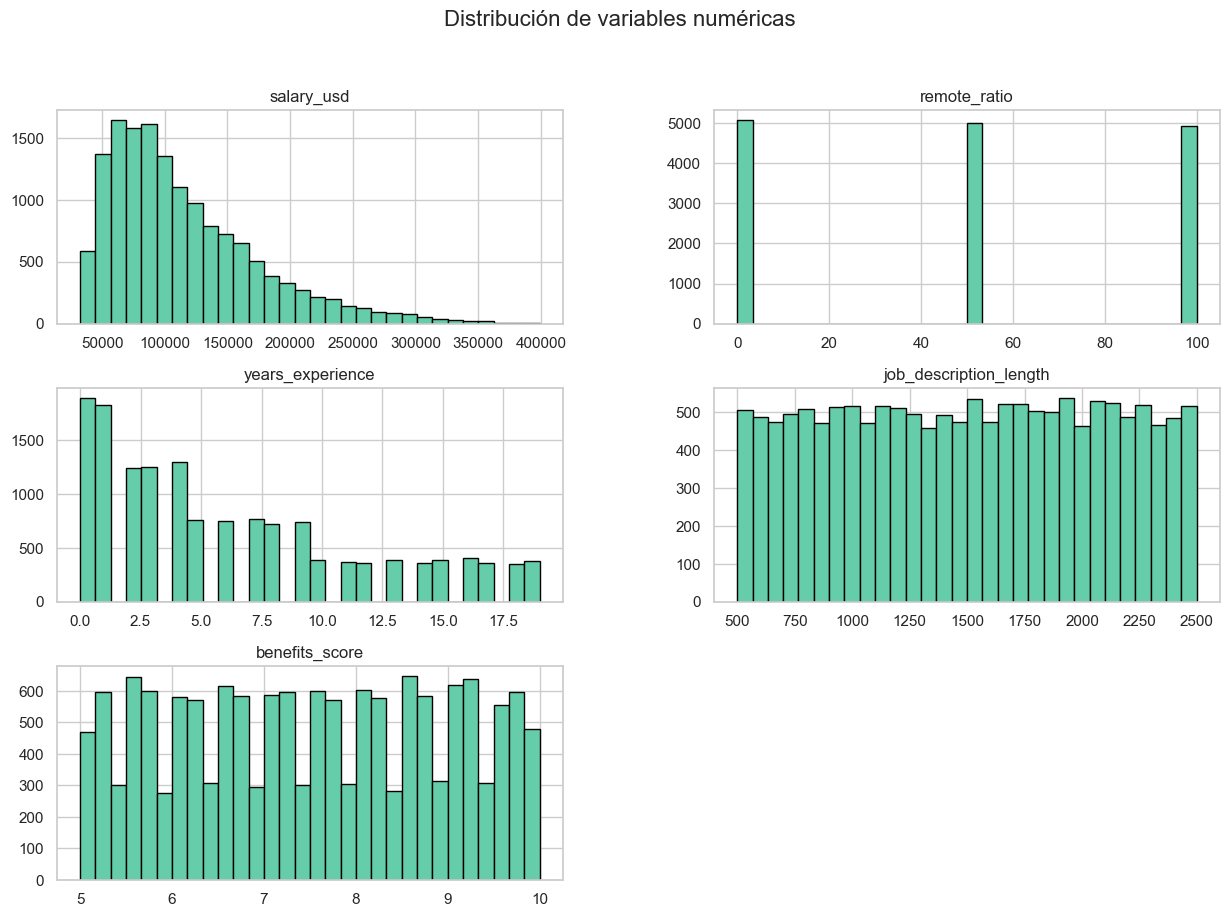

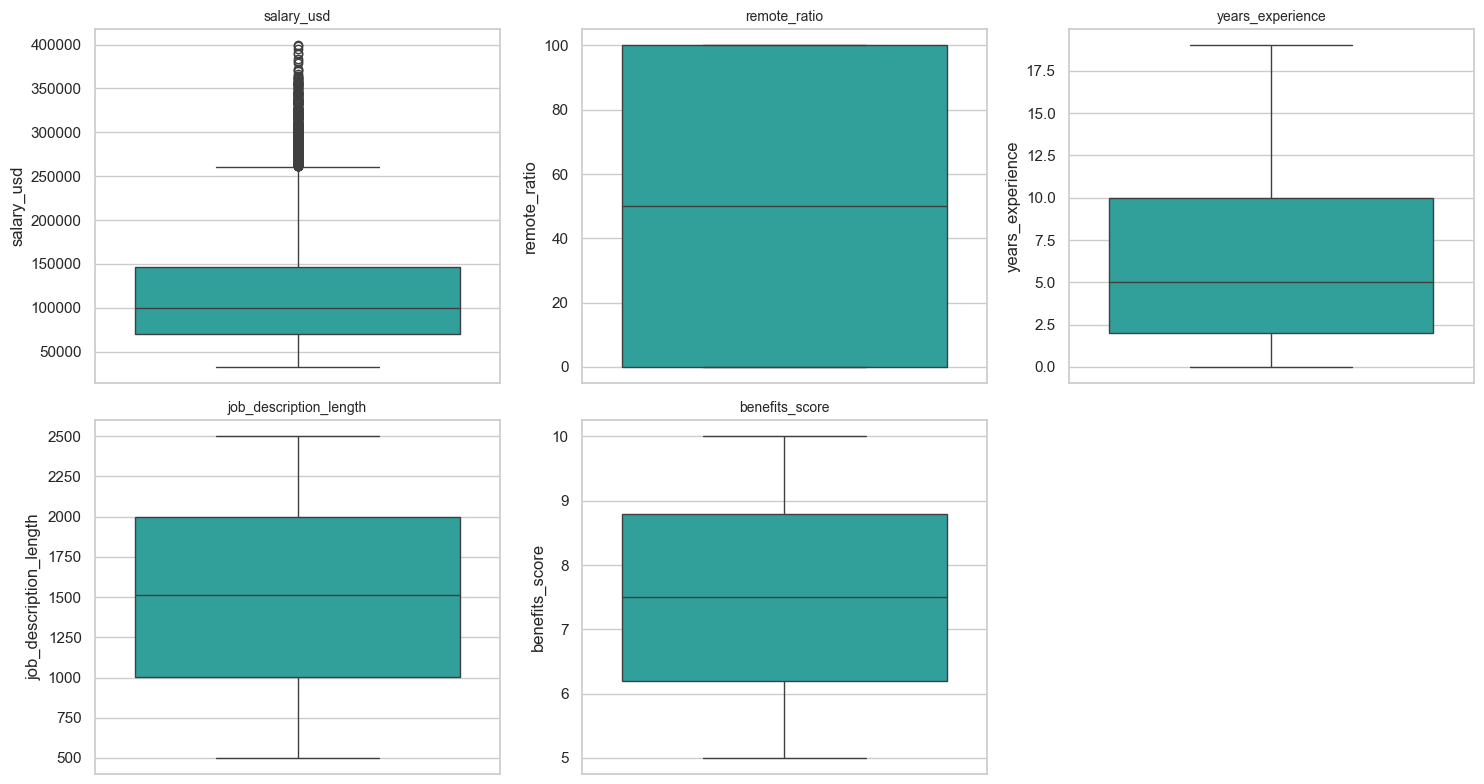

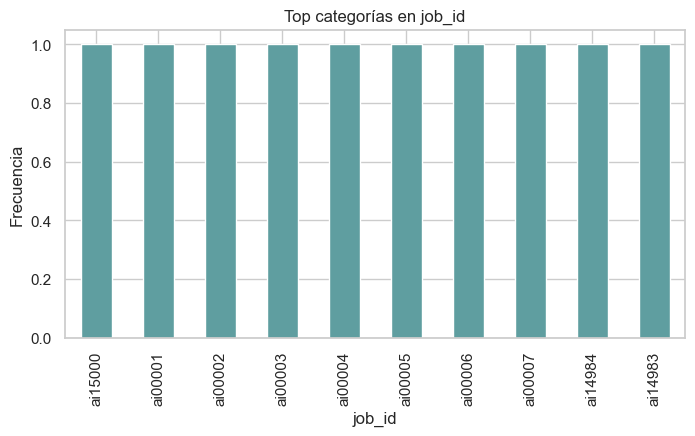

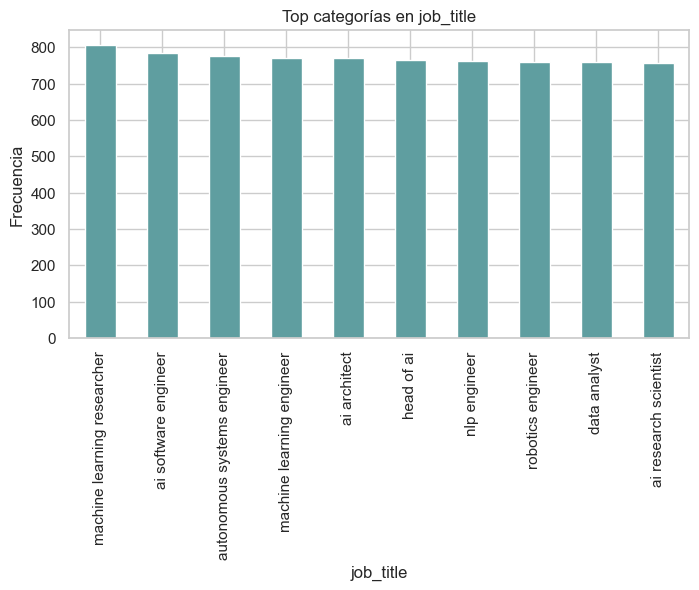

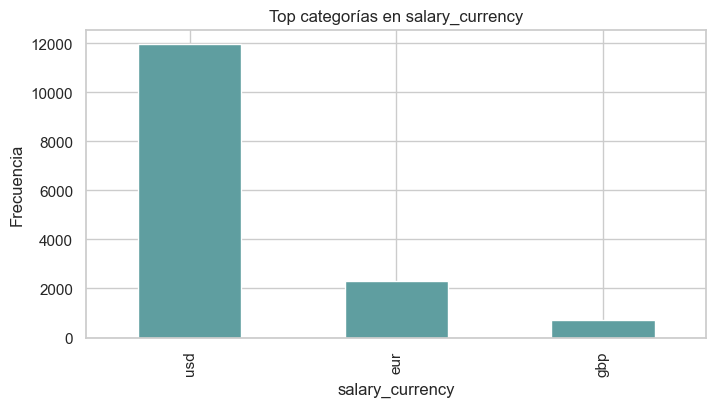


‚úÖ ETL FINAL completado con visualizaciones. Dataset guardado en: ai_job_dataset_final.csv
Dimensiones finales: (15000, 19)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n est√©tica
sns.set_theme(style="whitegrid", palette="crest")

# ========================
# 1. EXTRACT
# ========================
df = pd.read_csv("data/ai_job_dataset.csv")  # Ajustar ruta si hace falta
print("‚úî Archivo cargado correctamente")
print("Dimensiones iniciales:", df.shape)

# ========================
# 2. TRANSFORM
# ========================
# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

# ---- Gr√°fico valores nulos antes de limpiar ----
plt.figure(figsize=(12,5))
df.isnull().sum().sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Valores nulos por columna (antes de limpiar)")
plt.ylabel("Cantidad de nulos")
plt.show()

# Eliminar duplicados
df = df.drop_duplicates()

# Manejar valores nulos
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("desconocido")
    else:
        df[col] = df[col].fillna(df[col].median())

# Convertir columnas de fechas
date_cols = [col for col in df.columns if "date" in col or "fecha" in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Normalizar texto en categ√≥ricas
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# ---- Distribuci√≥n de variables num√©ricas ----
num_cols = df.select_dtypes(include="number").columns
df[num_cols].hist(bins=30, figsize=(15,10), color="mediumaquamarine", edgecolor="black")
plt.suptitle("Distribuci√≥n de variables num√©ricas", fontsize=16)
plt.show()

# ---- Boxplots de outliers ----
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="lightseagreen")
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

# ---- Conteo de categor√≠as en columnas relevantes ----
for col in cat_cols[:3]:  # primeras 3 categ√≥ricas
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind="bar", color="cadetblue")
    plt.title(f"Top categor√≠as en {col}")
    plt.ylabel("Frecuencia")
    plt.show()

# ========================
# 3. LOAD
# ========================
output_path = "ai_job_dataset_final.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n‚úÖ ETL FINAL completado con visualizaciones. Dataset guardado en: {output_path}")
print("Dimensiones finales:", df.shape)


üìä Exploratory Data Analysis (EDA) Final ‚Äì ai_job_dataset

El an√°lisis exploratorio de datos (EDA) final tuvo como objetivo comprender en profundidad la naturaleza del dataset, identificar patrones, inconsistencias y oportunidades de transformaci√≥n, as√≠ como preparar la informaci√≥n para an√°lisis estad√≠stico y modelado posterior.

1. Estructura general del dataset

Se revisaron las dimensiones (cantidad de filas y columnas), as√≠ como las primeras filas de datos. Esto permiti√≥:

Entender el tipo de informaci√≥n contenida (num√©rica, categ√≥rica, temporal).

Detectar posibles inconsistencias en los nombres de columnas o en el formato de los registros.

Confirmar que los datos son relevantes para el an√°lisis planteado (empleos en inteligencia artificial, salarios, experiencia, etc.).

2. Revisi√≥n de tipos de datos

Se analizaron los tipos de variables:

Num√©ricas: variables relacionadas con salarios, a√±os de experiencia, edad, etc.

Categ√≥ricas: variables de industria, rol, pa√≠s, nivel de educaci√≥n, etc.

Fechas: columnas relacionadas con a√±o, fecha de publicaci√≥n o antig√ºedad del puesto.

Esto permiti√≥ identificar columnas que requer√≠an conversi√≥n de tipo para ser tratadas correctamente en an√°lisis posteriores.

3. Valores faltantes y duplicados

Se cuantific√≥ la cantidad de valores nulos por columna.

Se detectaron columnas con proporciones significativas de valores faltantes que requer√≠an imputaci√≥n o an√°lisis adicional.

Se identificaron y eliminaron registros duplicados para asegurar que el dataset representara √∫nicamente casos √∫nicos.

El an√°lisis de nulos se acompa√±√≥ con gr√°ficos de barras que visualizaron en qu√© variables hab√≠a m√°s problemas de datos.

4. Estad√≠sticas descriptivas

Se calcularon estad√≠sticas para variables num√©ricas y categ√≥ricas:

Media, mediana, desviaci√≥n est√°ndar, valores m√≠nimo y m√°ximo para las num√©ricas.

Distribuciones de frecuencias para las categ√≥ricas.

Este paso permiti√≥ detectar:

Variables con alta dispersi√≥n (ej. salarios muy desiguales entre puestos).

Posibles inconsistencias en variables categ√≥ricas (ej. categor√≠as repetidas con may√∫sculas/min√∫sculas diferentes).

5. Distribuci√≥n de variables num√©ricas

Mediante histogramas se exploraron las distribuciones de las variables num√©ricas:

Se identificaron sesgos (ej. salarios sesgados hacia valores m√°s bajos).

Se detectaron concentraciones de valores en determinados rangos (ej. mayor√≠a de candidatos con 2‚Äì5 a√±os de experiencia).

Esto ayud√≥ a entender la estructura de los datos y la necesidad de transformaciones estad√≠sticas en el futuro (ej. normalizaci√≥n o escalado).

6. Correlaci√≥n entre variables

Se construy√≥ una matriz de correlaci√≥n visualizada con un heatmap:

Permiti√≥ ver relaciones lineales entre variables num√©ricas.

Identific√≥ correlaciones esperadas (ej. mayor experiencia correlacionada con mayor salario).

Tambi√©n se observaron variables con correlaci√≥n nula o irrelevante, lo que anticipa su bajo aporte en modelos predictivos.

7. Detecci√≥n de valores at√≠picos (outliers)

Mediante boxplots se detectaron valores extremos en variables num√©ricas:

En particular en salarios, donde algunos registros mostraban sueldos desproporcionadamente altos o bajos en comparaci√≥n con la mayor√≠a.

Estos outliers pueden deberse a errores de carga de datos o a casos excepcionales que conviene analizar aparte.

8. Distribuci√≥n de variables categ√≥ricas

Se analizaron las variables categ√≥ricas m√°s relevantes con gr√°ficos de barras:

Se observ√≥ la concentraci√≥n de ofertas en ciertos roles de IA.

La mayor√≠a de registros se concentraban en determinados pa√≠ses/industrias.

Algunas categor√≠as ten√≠an muy baja frecuencia, lo que sugiere que podr√≠an reagruparse o eliminarse en an√°lisis posteriores.

9. Principales insights del EDA final

El dataset est√° compuesto por una mezcla equilibrada de variables num√©ricas, categ√≥ricas y temporales.

Existen valores faltantes en ciertas columnas que requieren tratamiento diferenciado.

Los salarios y a√±os de experiencia presentan sesgos y outliers importantes, que deben manejarse antes de entrenar modelos.

Algunas variables categ√≥ricas presentan problemas de homogeneidad (ej. mismas categor√≠as escritas de manera distinta).

La correlaci√≥n mostr√≥ relaciones esperadas (experiencia ‚Äì salario), pero tambi√©n revel√≥ independencia entre otras variables.

‚úÖ Conclusi√≥n:
El EDA final permiti√≥ obtener una visi√≥n integral del dataset, identificar problemas de calidad de datos, confirmar patrones esperados en el dominio laboral de IA y sentar las bases para la preparaci√≥n y modelado avanzado.